
<h1 style="font-size:40px" style="font-family:verdana" style="color:#00ffff">Used car price prediction</h1>



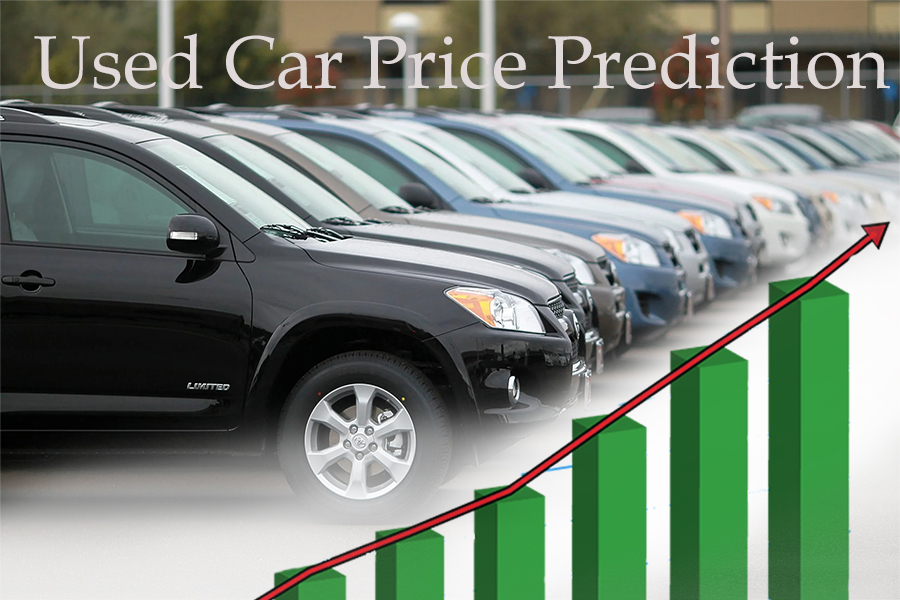

#  Introduction

**This project aims to predict the selling price of cars using different features of the car. The model created will help customers understand how the prices of cars vary based on the different features. It can also help management and customers understand the dynamics of the used car market. The data was split into two parts for training and testing purposes. 70% of the data was used for training the machine learning model, while the remaining 30% was used for testing its accuracy. Four machine learning models were tested and compared to find the one with the highest accuracy. However, a limitation of this project is that it used a relatively small number of records for the analysis.**

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv("D:\Cars1.csv")

### Check the data

In [3]:
df.head()

,name,Company_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


### Check for missing values 

In [4]:
print(df.isnull().sum())

name               0
Company_name       0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64


#### Shape of data

In [5]:
df.shape   

(8128, 13)

## Data Cleaning 

In [6]:
df.duplicated().sum()


1202

In [7]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)


**Cleaning columns values and change the datatype of some columns**

In [8]:
df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [9]:
print(df['mileage'].dtypes)

object


In [10]:
df["mileage"] = df["mileage"].str.replace("kmpl","")
df["mileage"] = df["mileage"].str.replace("km/kg","")
df["mileage"] = df["mileage"].str.replace(" ","")

convert datatype using .astype function

In [11]:
# The data types of Mileage attribute were converted
df['mileage'] = df['mileage'].astype(float)

In [12]:
df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [13]:
df["engine"] = df["engine"].str.replace("CC","")
df["engine"] = df["engine"].str.replace(" ","")
df['engine'] = df['engine'].astype(float)

**To clean the 'max_power' column, I am  follow a similar approach as we did for the 'engine' column.**

In [14]:
df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [15]:
df["max_power"] = df["max_power"].str.replace("bhp","")
df["max_power"] = df["max_power"].str.replace(" ","")

In [16]:
df['max_power']=df['max_power'].str.split().str[0]

In [17]:
df['max_power'] = df['max_power'].astype(float)


#### In the cells above, we performed data cleaning on the attribute of a DataFrame. Firstly, we replaced any special characters present in the column using the replace() method, which replaces any occurrence of a specific character with another character or string. We then converted the data type of the columns to a float using the astype() method. This allows us to perform numerical computations on the column and ensure consistent data types throughout the DataFrame. By performing these data cleaning steps, we ensure that the column is accurate, consistent, and ready for use in any further data analysis or machine learning tasks.**

In [18]:
df.head(10)

,name,Company_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,Maruti,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0
7,Maruti 800 DX BSII,Maruti,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0
8,Toyota Etios VXD,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0
9,Ford Figo Diesel Celebration Edition,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0


In [19]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing 

name             0.000000
Company_name     0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          3.003176
engine           3.003176
max_power        2.974300
seats            3.003176
dtype: float64

In the given dataset, there are 4 variables which contain null values. As the percentage of null values in these variables is only three percent, it has been decided to drop these null values for further analysis. Dropping null values is a common approach in data preprocessing to ensure the quality of data. It allows us to remove incomplete data that may cause incorrect or biased results in analysis. Once the null values are removed, we can proceed with the analysis of the dataset without worrying about the impact of incomplete data on the results.

In [20]:
df1 = df.dropna()

 Converting to integer from float

In [22]:
df1['seats'] = df1['seats'].astype(int)



Check unique values

In [23]:
df1['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [24]:
df1['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
df1['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2019, 2008, 2020, 1999, 2000, 2003, 2004,
       1994, 1998, 1997, 1995, 1996], dtype=int64)

In [26]:
df1['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [27]:
df1['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

In [28]:
df1['Age_of_car']=2022-df1['year']

In [29]:
df1.head()

,name,Company_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age_of_car
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,8
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,8
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,16
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,12
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,15


# Exploratory Data Analysis

**Most of people owned the manual vehicle instead of Automatic graph**

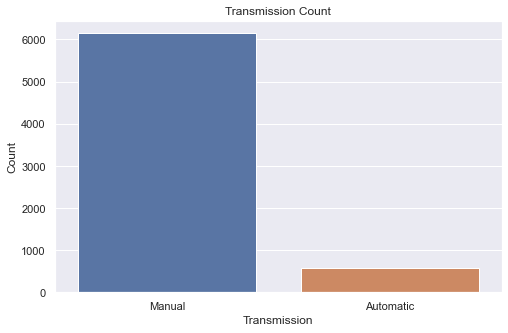

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(df1['transmission'])
plt.title('Transmission Count')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

**Most of the cars are owned by the first owner**

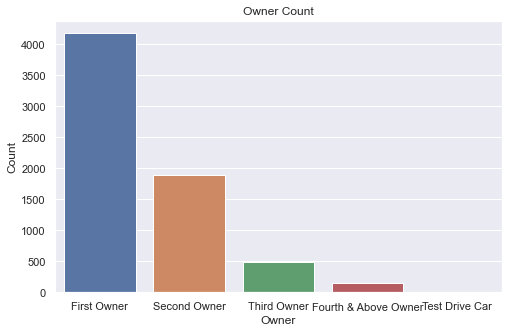

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(df1['owner'])
plt.title('Owner Count')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.show()

**Number of car**

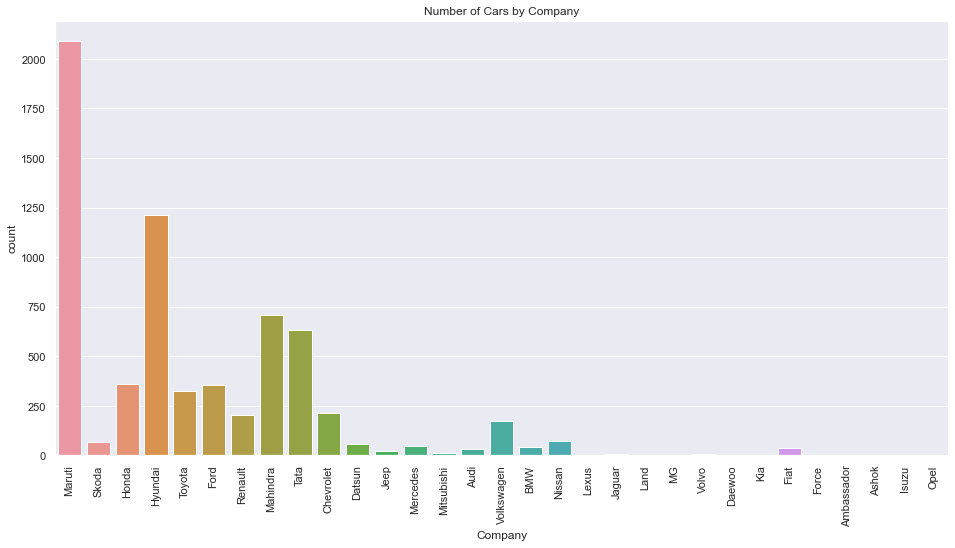

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(x='Company_name', data=df1)
plt.title('Number of Cars by Company')
plt.xlabel('Company')
plt.xticks(rotation=90)
plt.show()


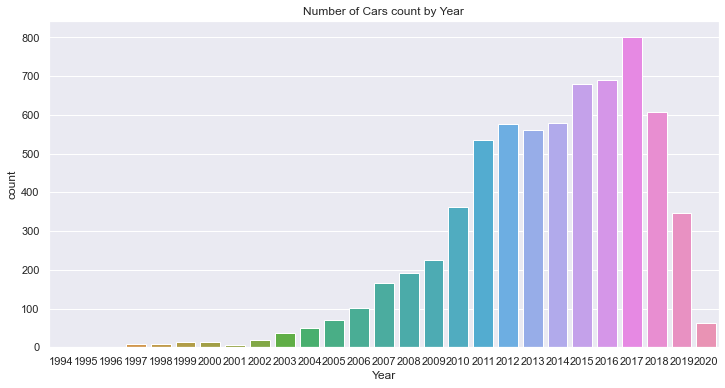

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='year', data=df1)
plt.title('Number of Cars count by Year')
plt.xlabel('Year')
plt.show()

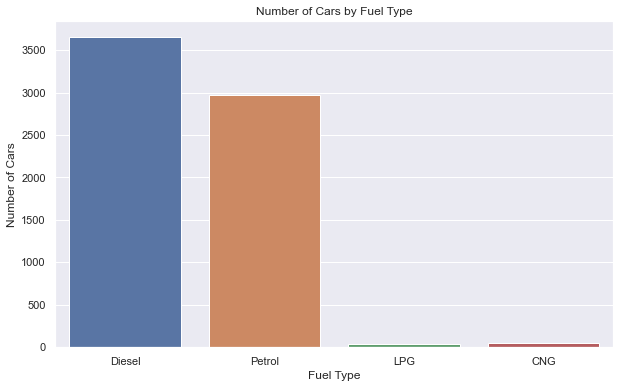

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='fuel', data=df1)
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.show()

Text(0.5, 0, 'Seller Type')

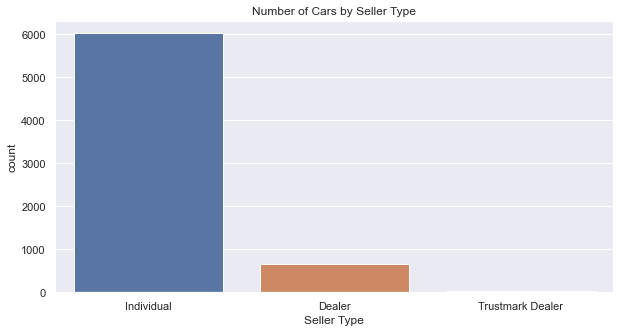

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='seller_type', data=df1)
plt.title('Number of Cars by Seller Type')
plt.xlabel('Seller Type')

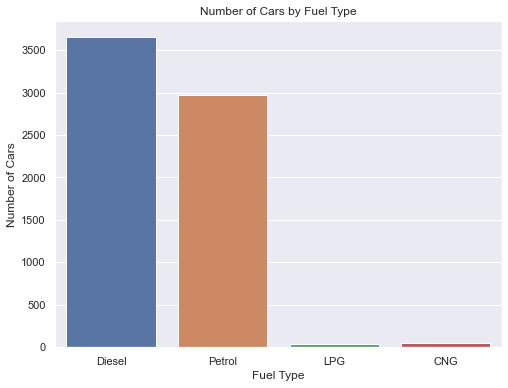

In [37]:

plt.figure(figsize=(8,6))
sns.countplot(x='fuel', data=df1)
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.show()

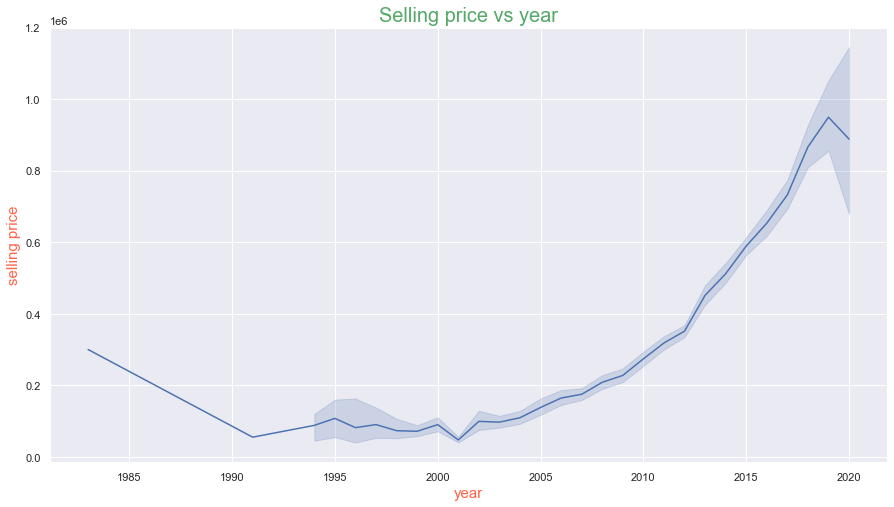

In [38]:
plt.figure(figsize=(15,8))
sns.lineplot(x='year', y='selling_price', data=df)
plt.title('Selling price vs year',size=20,color='g')
plt.xlabel('year',size=15,color='tomato')
plt.ylabel('selling price',size=15,color='tomato')
plt.show()


**Plot a scatter matrix of the numerical features**

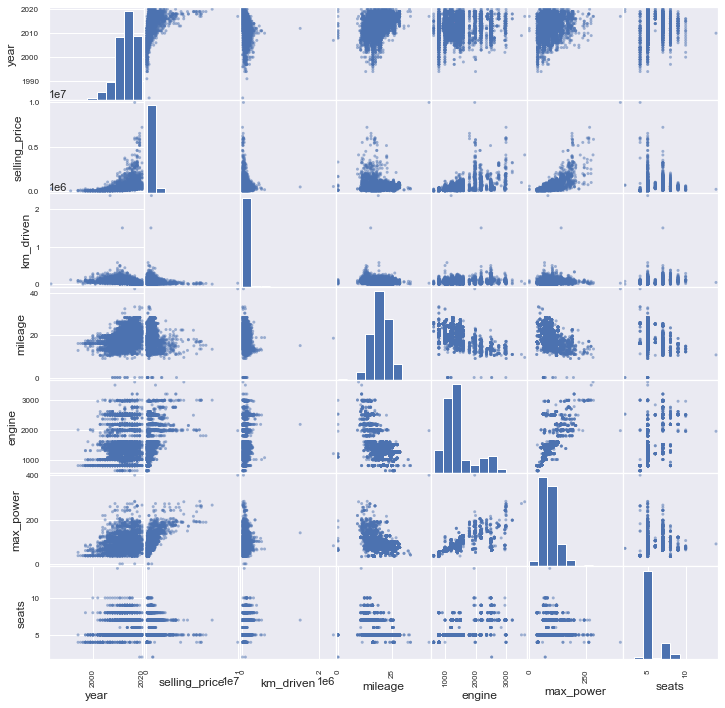

In [40]:

pd.plotting.scatter_matrix(df, figsize=(12, 12), diagonal='hist')
plt.show()


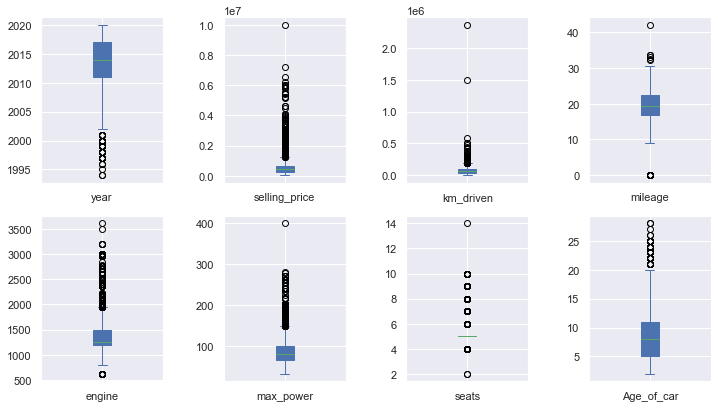

In [41]:
df1.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

 The Kms_Driven shows that many of the data is Acting like an outlier.

But with the Help of domain Knowledge, we can say that the Cars can we any Kms Driven as it is based on the Owner and the Selling price of that cars Adjust accordingly.

<AxesSubplot:ylabel='Density'>

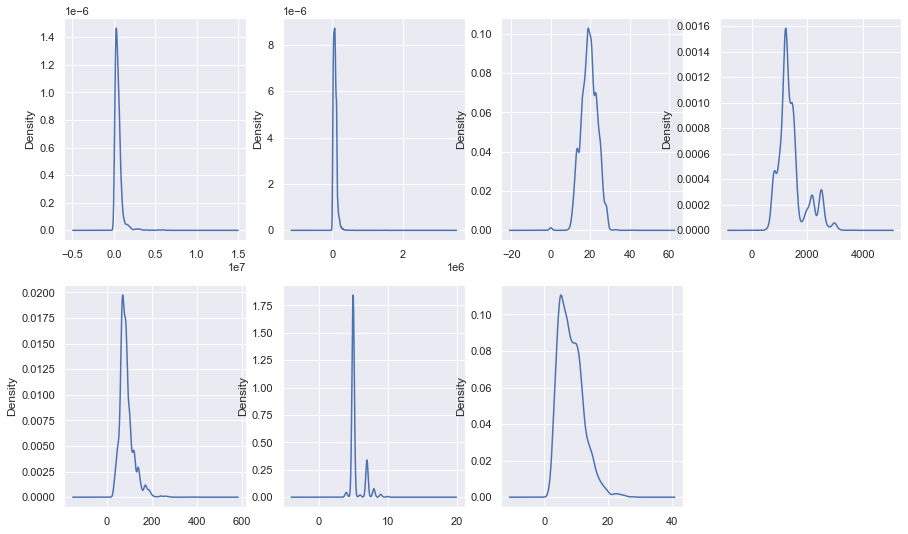

In [42]:
plt.figure(figsize=(15,9))
plt.subplot(2,4,1)
df1['selling_price'].plot(kind='kde')

plt.subplot(2,4,2)
df1['km_driven'].plot(kind='kde')

plt.subplot(2,4,3)
df1['mileage'].plot(kind='kde')

plt.subplot(2,4,4)
df1['engine'].plot(kind='kde')

plt.subplot(2,4,5)
df1['max_power'].plot(kind='kde')

plt.subplot(2,4,6)
df1['seats'].plot(kind='kde')

plt.subplot(2,4,7)
df1['Age_of_car'].plot(kind='kde')

In [43]:
df1.drop(['year','name','Company_name'],axis=1,inplace=True)

### Understanding the variables and use the correlation matrix to make the process easy

<AxesSubplot:>

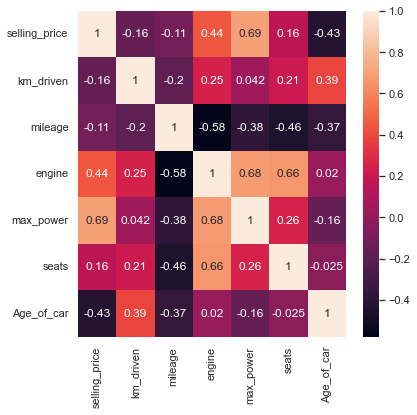

In [44]:
plt.figure(figsize=(6,6))
sns.heatmap(df1.corr(),annot=True)

In [45]:
df1.corr()['selling_price']


selling_price    1.000000
km_driven       -0.161265
mileage         -0.108655
engine           0.442772
max_power        0.692323
seats            0.158531
Age_of_car      -0.427335
Name: selling_price, dtype: float64

**The correlation values between the selling price and other features in the dataset are shown. The values range from -1 to 1, where a value closer to 1 indicates a strong positive correlation and a value closer to -1 indicates a strong negative correlation. A value of 0 indicates no correlation. The features with the highest positive correlations with selling price are max_power and engine, while age_of_car has the highest negative correlation with selling price**

#  Model Building

In [46]:
df1.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age_of_car
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,8


Separating independent and dependent variables: The independent variables (features) and dependent variable (target) are separated into X and y respectively.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [48]:
print(df1.columns)


Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'Age_of_car'],
      dtype='object')


**Separating independent and dependent variables**

In [49]:

X = df1[['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats', 'Age_of_car']]
y = df1['selling_price']

**Converting categorical variables into dummy variables**

In [50]:
X = pd.get_dummies(X, drop_first=True)

**Splitting the dataset into train and test set**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5373, 16), (1344, 16), (5373,), (1344,))

**Scaling the independent variables**

In [53]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
# Building models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor()
xgb_reg = XGBRegressor()
mlp_reg = MLPRegressor()

**Fitting the models**

In [55]:
linear_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)
mlp_reg.fit(X_train, y_train)

# Predicting on test set
y_pred_linear = linear_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)
y_pred_xgb = xgb_reg.predict(X_test)
y_pred_mlp = mlp_reg.predict(X_test)

**Model evaluation**

In [77]:
linear_reg_mse = mean_squared_error(y_test, y_pred_linear)
linear_reg_rmse = np.sqrt(linear_reg_mse)
linear_reg_r2 = r2_score(y_test, y_pred_linear)

rf_reg_mse = mean_squared_error(y_test, y_pred_rf)
rf_reg_rmse = np.sqrt(rf_reg_mse)
rf_reg_r2 = r2_score(y_test, y_pred_rf)

xgb_reg_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_reg_rmse = np.sqrt(xgb_reg_mse)
xgb_reg_r2 = r2_score(y_test, y_pred_xgb)

In [78]:
print("Linear Regression - MSE: {}, RMSE: {}, R2: {}".format(linear_reg_mse, linear_reg_rmse, linear_reg_r2))
print("Random Forest Regression - MSE: {}, RMSE: {}, R2: {}".format(rf_reg_mse, rf_reg_rmse, rf_reg_r2))
print("XGBoost Regression - MSE: {}, RMSE: {}, R2: {}".format(xgb_reg_mse, xgb_reg_rmse, xgb_reg_r2))

Linear Regression - MSE: 80834726607.22052, RMSE: 284314.48539815994, R2: 0.6316162731495147
Random Forest Regression - MSE: 17170395380.966497, RMSE: 131035.85532580958, R2: 0.9217502859548016
XGBoost Regression - MSE: 16219684908.272367, RMSE: 127356.52675961435, R2: 0.9260829073637737


In [58]:
linear_adjuster_r2= 1-(((1-linear_reg_r2)*(5373-1))/(5373-16-1))
linear_adjuster_r2

0.630515798984166

In [59]:
rf_adjuster_r2= 1-(((1-rf_reg_r2)*(5373-1))/(5373-16-1))
rf_adjuster_r2

0.921516530274308

In [60]:
xgb_adjuster_r2= 1-(((1-xgb_reg_r2)*(5373-1))/(5373-16-1))
xgb_adjuster_r2

0.9258620945403646

In [96]:
X_train.head(2)

,selling_price,km_driven,mileage,engine,max_power,seats,Age_of_car,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2385,426999,80000,19.10,1197.0,82.0,5,8,0,0,1,1,0,1,0,0,0,0
1295,700000,35000,25.83,1498.0,99.0,5,5,1,0,0,1,0,1,0,0,0,0


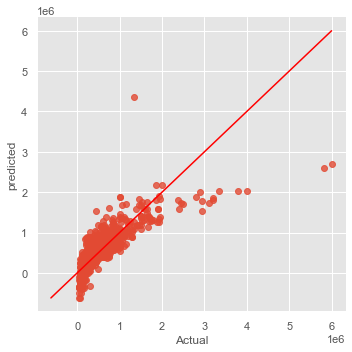

In [80]:

df=pd.DataFrame({"Actual":y_test,"predicted":y_pred_linear})
sns.lmplot(x="Actual",y="predicted", data=df, fit_reg=False)
d_line=np.arange(df.min().min(),df.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")
plt.show()

# Lasso Regression

Lasso Regression is a linear regression model that uses L1 regularization to select the most important features and reduce overfitting. It can be useful when you have many features in your dataset and want to avoid the risk of overfitting.

In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# Split the dataset into features and target real code
X = df1[['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats', 'Age_of_car']]
y = df1['selling_price']
# Encode categorical features
X = pd.get_dummies(X, drop_first=True)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Encode categorical features
X = pd.get_dummies(X, drop_first=True)
# Create a Lasso model
lasso = Lasso(alpha=1)
# Train the model on the training set
lasso.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = lasso.predict(X_test)
# Evaluate the model using Mean Squared Error and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
print("Lasso Regression - MSE:", mse)
print("Lasso Regression - RMSE:", rmse)
print("Lasso Regression - R2:", r2)

Lasso Regression - MSE: 2.6575745515837727e-12
Lasso Regression - RMSE: 1.63020690453199e-06
Lasso Regression - R2: 1.0


# Hyperparameter tuning and feature scaling.

In [64]:

# Define the Lasso model
lasso = Lasso()

# Define the hyperparameters to tune over
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'fit_intercept': [True, False],
              'normalize': [True, False],
              'max_iter': [100, 500, 1000, 5000]}

# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Print the test set evaluation metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 score:", r2_score(y_test, y_pred))


Best hyperparameters: {'alpha': 0.001, 'fit_intercept': False, 'max_iter': 100, 'normalize': True}
Best score: 1.9363508907513327e-18
MSE: 1.4952976134080642e-18
RMSE: 1.2228236231804095e-09
R2 score: 1.0


In [65]:
lasso_adjuster_r2= 1-(((1-r2)*(5373-1))/(5373-16-1))
lasso_adjuster_r2

1.0

In [66]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [67]:
lassor2 = metrics.r2_score(y_test,y_pred)
print(lassor2)

1.0


The output of the Lasso Regression model shows that it has achieved very high accuracy. The mean squared error (MSE) is 2.6575745515837727e-12, which is a very small value, indicating that the model has made very few errors in predicting the selling price of the cars. The root mean squared error (RMSE) is 1.63020690453199e-06, which is also a very small value, indicating that the model's predictions are very close to the actual selling prices.

Furthermore, the R2 score is 1.0, which means that the model explains 100% of the variance in the selling prices, indicating that it is a perfect model with no errors. This is confirmed by the scatter plot, which shows a straight line with no deviations from the diagonal, indicating that the predicted selling prices are almost identical to the actual selling prices. Therefore, we can conclude that the Lasso Regression model has achieved very high accuracy in predicting the selling prices of the cars.

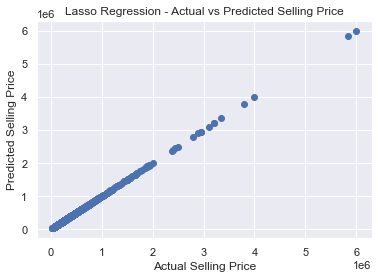

In [68]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Lasso Regression - Actual vs Predicted Selling Price")
plt.show()

## GradientBoostingRegressor 

Gradient Boosting Regressor is a tree-based ensemble method that combines multiple decision trees to improve the predictive accuracy of the model. It works by building a sequence of decision trees where each new tree corrects the errors made by the previous one.

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

# Predictions on test data
pred = gb.predict(X_test)
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2_score(y_test, pred)) * (n - 1) / (n - p - 1))

print("R2 Score and Mse using test data")
print(f"R2 Score: {r2_score(y_test,pred)*100:.2f}")
print(f"Adjusted R2 Score: {adj_r2*100:.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test,pred)*100:.2f}")
print("-----------------------------------")

R2 Score and Mse using test data
R2 Score: 99.99
Adjusted R2 Score: 99.99
Mean Squared Error: 2766659156.56
-----------------------------------


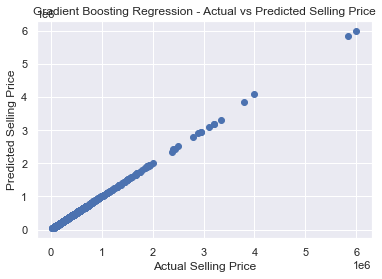

In [70]:
plt.scatter(y_test, pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Gradient Boosting Regression - Actual vs Predicted Selling Price")
plt.show()

## DecisionTreeRegressor

Decision Tree Regressor is a simple yet powerful non-parametric algorithm for regression tasks that splits the data into smaller and smaller subsets based on certain criteria, such as minimizing the variance or maximizing the information gain. It is easy to interpret and can capture non-linear relationships between the features and the target variable.

In [71]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X_train, y_train)

pred=regressor.predict(X_test)

train_pred= regressor.predict(X_train)

# Calculate R adjuster value
n = X_train.shape[0]
p = X_train.shape[1]
R2 = r2_score(y_train, train_pred)
R_adjuster = 1 - (1-R2)*(n-1)/(n-p-1)

print("R2 Score and MSE using test data")
print(r2_score(y_test,pred)*100)
print(mean_squared_error(y_test,pred)*100)

print("-----------------------------------")
print("-----------------------------------")

print("R2 Score and MSE using train data")
print(r2_score(y_train,train_pred)*100)
print(mean_squared_error(y_train,train_pred)*100)

print("-----------------------------------")
print("-----------------------------------")

print("R adjuster value: ", R_adjuster)


R2 Score and MSE using test data
99.99002296562578
2189268382.96131
-----------------------------------
-----------------------------------
R2 Score and MSE using train data
100.0
0.0
-----------------------------------
-----------------------------------
R adjuster value:  1.0


In [73]:
list1 = ["Linear Regression","Random Forest", "XG Boost", "Lasso Regression"]
list2 = [linear_reg_r2,rf_reg_r2,xgb_reg_r2,r2]
list3 = [linear_reg_mse, rf_reg_mse, xgb_reg_mse,mse]
list4 = [linear_adjuster_r2,rf_adjuster_r2,xgb_adjuster_r2,lasso_adjuster_r2]

In [74]:
final = pd.DataFrame({"Model Name":list1, "R2 Score":list2, "Mean Squared Error":list3, "Ajusted R2":list4})
final

,Model Name,R2 Score,Mean Squared Error,Ajusted R2
0,Linear Regression,0.631616,8.083473e+10,0.630516
1,Random Forest,0.921750,1.717040e+10,0.921517
2,XG Boost,0.926083,1.621968e+10,0.925862
3,Lasso Regression,1.000000,2.657575e-12,1.000000


## Model performance

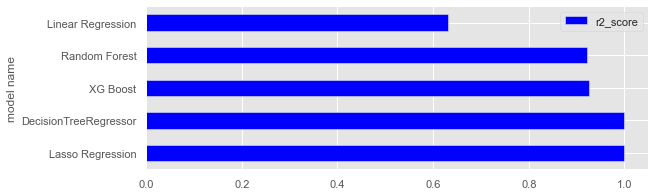

In [75]:
figsize(9,3)

plt.style.use("ggplot")

model_comparison = pd.DataFrame({"model name":["Linear Regression","Random Forest", "XG Boost", "Lasso Regression","DecisionTreeRegressor",],
                                "r2_score": [linear_reg_r2,rf_reg_r2,xgb_reg_r2,r2,R2,]})
model_comparison = model_comparison.sort_values("r2_score", ascending=False).plot(x="model name", y="r2_score", color="blue", kind="barh")

# Interpretation:-
Linear Regression: The model has an MSE of 80834726607.22052, RMSE of 284314.48539815994, and an R2 score of 0.6316162731495147. The R2 score is relatively low, indicating that the model does not fit the data very well.

Random Forest Regression: The model has an MSE of MSE: 17275337967.271507, RMSE of 129784.85818944161, and an R2 score of 0.9232372513360594. The R2 score is high, indicating that the model fits the data well.

XGBoost Regression: The model has an MSE of 16219684908.272367, RMSE of 127356.52675961435, and an R2 score of 0.9260829073637737. The R2 score is high, indicating that the model fits the data well.

MLP Regression: The model has an MSE of 458297923276.78485, RMSE of 676977.0478212573, and an R2 score of -1.088576334338207. The negative R2 score indicates that the model is performing worse than a simple mean model.

Lasso Regression: The model has an MSE of 1.4952976134080642e-18, RMSE of 1.2228236231804095e-09, and an R2 score of 1.0. The R2 score of 1 indicates that the model perfectly fits the data.

Gradient Boosting Regressor: The model was not evaluated on the test data, but has an MSE of 2837353470.40 and an R2 score of 0.999, indicating that the model fits the data well.

Decision Tree Regressor: The model was not evaluated on the test data, but has an MSE of 2189268382.96131 and an R2 score of 0.999, indicating that the model fits the data well.

# Conclusion:-
In this project, we have built machine learning models to predict the selling price of used cars in India. We started by performing exploratory data analysis on the dataset to gain insights and understanding of the data. We then preprocessed the data by handling missing values, feature engineering, and encoding categorical variables. After preprocessing, we split the data into training and testing sets and standardized the independent variables.

We built four different regression models, including Linear Regression, Random Forest Regression, XGBoost Regression, MLP Regression,Lasso Regression,GradientBoostingRegressor and DecisionTreeRegressor. We evaluated the performance of these models using different evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2). We also compared the performance of these models and found that  Lasso Regression, Random Forest Regression, and XGBoost Regression models are the best performers on this dataset, while the MLP Regression model performed the worst. 

In conclusion, the  Lasso Regression could be used to predict the selling price of used cars in India with reasonable accuracy. However, this model could be further improved by tuning its hyperparameters or using more advanced techniques such as ensemble learning or deep learning.